Import bibliotek:

In [67]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.utils import shuffle

In [4]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
data = pd.read_csv("student-mat.csv", sep = ',')

Przygotowanie danych do analizy:

In [6]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [8]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [9]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [10]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [31]:
round(data.describe(),2) 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


Analiza danych:

Wiek studentów:

In [25]:
age = data["age"].value_counts()
print(age)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


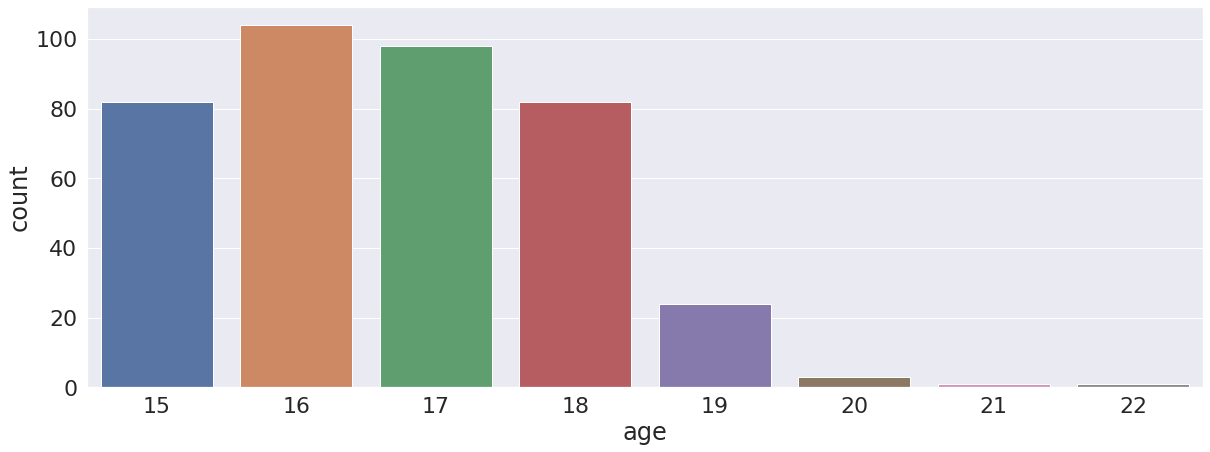

In [55]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.countplot(data.age);

Najwięcej studentów jest w wieku 16 lat, najmniej w wieku 21 lat

Korelacja:


In [13]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [30]:
r = data.corr()

p = data.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*r.shape)
p = p.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
r.round(2).astype(str) + p



,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.0***,-0.16***,-0.16***,0.07,-0.0,0.24***,0.05,0.02,0.13**,0.13***,0.12**,-0.06,0.18***,-0.06,-0.14***,-0.16***
Medu,-0.16***,1.0***,0.62***,-0.17***,0.06,-0.24***,-0.0,0.03,0.06,0.02,-0.05,-0.05,0.1**,0.21***,0.22***,0.22***
Fedu,-0.16***,0.62***,1.0***,-0.16***,-0.01,-0.25***,-0.0,-0.01,0.04,0.0,-0.01,0.01,0.02,0.19***,0.16***,0.15***
traveltime,0.07,-0.17***,-0.16***,1.0***,-0.1**,0.09*,-0.02,-0.02,0.03,0.14***,0.13***,0.01,-0.01,-0.09*,-0.15***,-0.12**
studytime,-0.0,0.06,-0.01,-0.1**,1.0***,-0.17***,0.04,-0.14***,-0.06,-0.2***,-0.25***,-0.08,-0.06,0.16***,0.14***,0.1*
failures,0.24***,-0.24***,-0.25***,0.09*,-0.17***,1.0***,-0.04,0.09*,0.12**,0.14***,0.14***,0.07,0.06,-0.35***,-0.36***,-0.36***
famrel,0.05,-0.0,-0.0,-0.02,0.04,-0.04,1.0***,0.15***,0.06,-0.08,-0.11**,0.09*,-0.04,0.02,-0.02,0.05
freetime,0.02,0.03,-0.01,-0.02,-0.14***,0.09*,0.15***,1.0***,0.29***,0.21***,0.15***,0.08,-0.06,0.01,-0.01,0.01
goout,0.13**,0.06,0.04,0.03,-0.06,0.12**,0.06,0.29***,1.0***,0.27***,0.42***,-0.01,0.04,-0.15***,-0.16***,-0.13***
Dalc,0.13***,0.02,0.0,0.14***,-0.2***,0.14***,-0.08,0.21***,0.27***,1.0***,0.65***,0.08,0.11**,-0.09*,-0.06,-0.05


Jak wygląda konsumpcja alkoholu w tygodniu przez studentów?


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


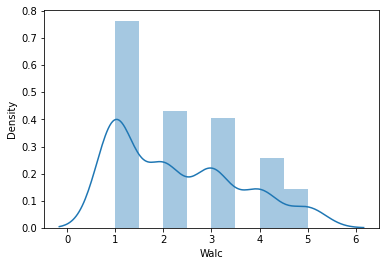

In [14]:
sns.distplot(data['Walc'],kde =True)

In [44]:
def create_plot(n: int, m: int, size: tuple = (12, 5)): 
    fig, ax = plt.subplots(n, m, figsize=size)
    return fig, ax

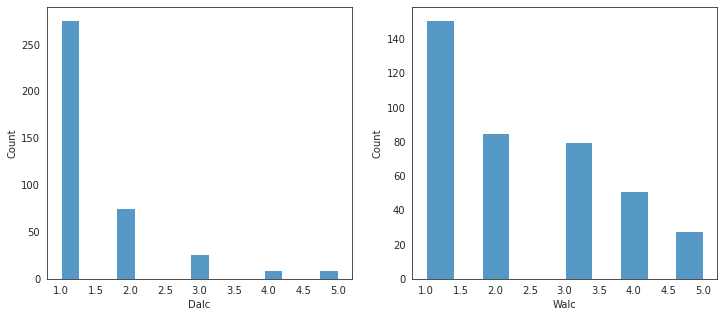

In [46]:
fig, ax = create_plot(1, 2)

sns.histplot(data['Dalc'], ax=ax[0])
sns.histplot(data['Walc'], ax=ax[1])
plt.show()

In [49]:
daily = data[data['Dalc'] >= 3.0]
weekly = data[data['Walc'] >= 3.0]

daily_count = len(daily)
weekly_count = len(weekly)

p_daily = np.round((daily_count / len(data)) * 100)
p_weekly = np.round((weekly_count / len(data)) * 100)

print(f'{p_daily}%, {p_weekly}%')

11.0%, 40.0%


Z tego co widzimy:


*  Najwięcej studentów spożywa alkohol raz w tygodniu
*  Żaden ze studentów nie spożywa alkoholu zero razy w tygodniu
*  Żaden ze studentów nie spożywa alkoholu więcej niż 5 razy w tygodniu

„Dalc” i „Walc” – Dzienne i tygodniowe spożycie alkoholu to wartości dyskretne w zakresie od 1,0 (bardzo niskie) do 5,0 (bardzo wysokie). Mimo że rozkłady mogą wyglądać całkiem normalnie, jedną z ciekawych obserwacji, którą poczyniłem, jest to, że 40% uczniów pije alkohol co tydzień z wartością „Walc” większą lub równą 3,0, co można uznać za dość wysoką.

Jeszcze bardziej niepokojący jest fakt, że 11% osób pijących codziennie to studenci z wartością „Dalc” większą lub równą 3,0. 






Jak przyjrzymy się dalej zauważymy, że najwięcej alkoholu piją studenci w wieku 17lat. Potem zauważamy ewidentny spadek konsumpcji. 
Być moze wynikać to z tego, że w naszym zbiorze danych zdecydowanie więcej jest studentów w wieku 17lat.

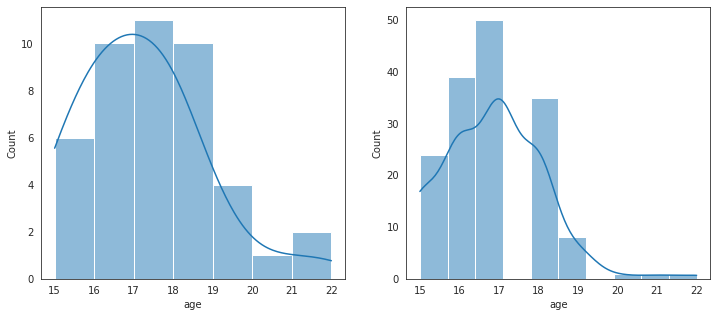

In [50]:
fig, ax = create_plot(1, 2)

sns.histplot(daily['age'], ax=ax[0], kde=True)
sns.histplot(weekly['age'], ax=ax[1], kde=True)
plt.show()

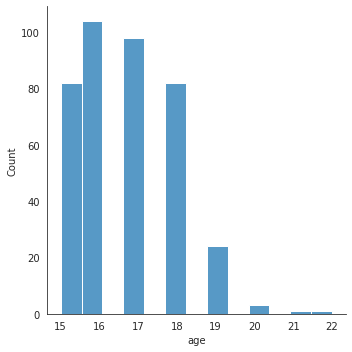

In [54]:
sns.displot(data['age'])
plt.show()

Przewidywanie oceny końcowej:

In [134]:
data1 = pd.read_csv("student-mat.csv",sep=",")
data2 = pd.read_csv("student-por.csv",sep=",")
data3 = [data1,data2]
data3=pd.concat(data3)
data3=shuffle(data3) # import oraz połączenie danych

In [135]:
data3.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.00,-0.13,-0.14,0.05,-0.01,0.28,0.01,0.00,0.12,0.13,0.10,-0.03,0.15,-0.12,-0.12,-0.13
Medu,-0.13,1.00,0.64,-0.24,0.09,-0.19,0.02,0.00,0.03,0.00,-0.03,-0.01,0.06,0.23,0.22,0.20
Fedu,-0.14,0.64,1.00,-0.20,0.03,-0.19,0.01,0.00,0.03,-0.00,0.02,0.03,0.04,0.20,0.18,0.16
traveltime,0.05,-0.24,-0.20,1.00,-0.08,0.09,-0.01,-0.01,0.05,0.11,0.08,-0.03,-0.02,-0.12,-0.14,-0.10
studytime,-0.01,0.09,0.03,-0.08,1.00,-0.15,0.01,-0.09,-0.07,-0.16,-0.23,-0.06,-0.08,0.21,0.18,0.16
failures,0.28,-0.19,-0.19,0.09,-0.15,1.00,-0.05,0.10,0.07,0.12,0.11,0.05,0.10,-0.37,-0.38,-0.38
famrel,0.01,0.02,0.01,-0.01,0.01,-0.05,1.00,0.14,0.08,-0.08,-0.10,0.10,-0.06,0.04,0.04,0.05
freetime,0.00,0.00,0.00,-0.01,-0.09,0.10,0.14,1.00,0.32,0.14,0.13,0.08,-0.03,-0.05,-0.07,-0.06
goout,0.12,0.03,0.03,0.05,-0.07,0.07,0.08,0.32,1.00,0.25,0.40,-0.01,0.06,-0.10,-0.11,-0.10
Dalc,0.13,0.00,-0.00,0.11,-0.16,0.12,-0.08,0.14,0.25,1.00,0.63,0.07,0.13,-0.15,-0.13,-0.13


In [136]:
data3=data3.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]) # usunięcie duplikatów

In [162]:
data3 = data3.drop(["traveltime","famrel","freetime","goout","health","absences"], axis=1)  # usunięcie danych z najmniejszą korelacją z ocenami

In [140]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")  # błędy

In [143]:
# czyszczenie danych
data3.school[data3.school == 'GP'] = 1
data3.school[data3.school == 'MS'] = 0
data3.sex[data3.sex == 'M'] = 1
data3.sex[data3.sex == 'F'] = 0
data3.address[data3.address == 'U'] = 1
data3.address[data3.address == 'R'] = 0
data3.famsize[data3.famsize == 'GT3'] = 1
data3.famsize[data3.famsize == 'LE3'] = 0
data3.Pstatus[data3.Pstatus == 'T'] = 1
data3.Pstatus[data3.Pstatus == 'A'] = 0
cols_to_transform = [ 'Mjob','Fjob','reason','guardian' ]
data3=pd.get_dummies(data3,columns=cols_to_transform)  

In [145]:
data3.schoolsup[data3.schoolsup == 'yes'] = 1
data3.schoolsup[data3.schoolsup == 'no'] = 0
data3.famsup[data3.famsup == 'yes'] = 1
data3.famsup[data3.famsup == 'no'] = 0
data3.paid[data3.paid == 'yes'] = 1
data3.paid[data3.paid == 'no'] = 0
data3.activities[data3.activities == 'yes'] = 1
data3.activities[data3.activities == 'no'] = 0
data3.nursery[data3.nursery == 'yes'] = 1
data3.nursery[data3.nursery == 'no'] = 0
data3.higher[data3.higher == 'yes'] = 1
data3.higher[data3.higher == 'no'] = 0
data3.internet[data3.internet == 'yes'] = 1
data3.internet[data3.internet == 'no'] = 0
data3.romantic[data3.romantic == 'yes'] = 1
data3.romantic[data3.romantic == 'no'] = 0

data3.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
307,1,1,19,1,1,1,4,4,2,1,1,0,1,1,0,1,1,1,1,4,3,4,1,1,4,38,8,9,8,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
107,1,1,16,1,1,1,3,3,1,3,0,0,1,0,1,1,1,1,0,5,3,3,1,1,5,2,16,18,18,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
572,0,0,16,1,1,0,3,2,2,2,2,0,1,0,1,1,1,0,1,2,5,5,1,1,1,8,5,5,7,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
279,1,1,18,1,0,1,4,3,2,1,0,0,0,1,1,1,1,1,0,4,2,3,1,2,1,8,10,11,10,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
290,1,0,19,1,1,1,2,2,1,2,0,0,1,0,0,1,1,1,0,4,3,3,1,1,5,0,10,10,11,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
260,1,0,18,1,1,1,4,3,1,2,0,0,1,1,0,1,1,1,1,3,1,2,1,3,2,21,17,18,18,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
302,1,0,17,1,1,1,4,2,2,3,0,0,1,1,0,1,1,1,0,4,3,3,1,1,3,0,15,12,14,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
71,1,1,15,1,1,1,4,2,1,4,0,0,0,0,0,1,1,1,0,3,3,3,1,1,3,0,11,9,10,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
288,1,0,18,1,0,0,2,1,1,2,0,0,1,0,0,0,1,1,1,4,3,4,1,3,5,2,12,12,13,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
63,1,0,16,1,1,1,4,3,1,3,0,1,1,0,1,1,1,1,0,3,4,4,2,4,4,0,14,13,13,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0


In [146]:
# finalna ocena
y =  data3[[ 'G3']].mean(axis=1)
data3 = data3.drop(["G3"], axis=1)
data3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
307,1,1,19,1,1,1,4,4,2,1,1,0,1,1,0,1,1,1,1,4,3,4,1,1,4,38,8,9,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
107,1,1,16,1,1,1,3,3,1,3,0,0,1,0,1,1,1,1,0,5,3,3,1,1,5,2,16,18,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
572,0,0,16,1,1,0,3,2,2,2,2,0,1,0,1,1,1,0,1,2,5,5,1,1,1,8,5,5,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
279,1,1,18,1,0,1,4,3,2,1,0,0,0,1,1,1,1,1,0,4,2,3,1,2,1,8,10,11,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
290,1,0,19,1,1,1,2,2,1,2,0,0,1,0,0,1,1,1,0,4,3,3,1,1,5,0,10,10,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0


In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data3,y, test_size=0.2) # #dzielenie danych do trenowania i testowania odpowiednio o 80% i 20%

Regresja liniowa:

In [163]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = np.round(regr.predict(X_test))
meansqr=[]
Avgdiff=[]
r2=[]
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
t = np.arange(0,len(y_pred) , 1)
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Mean difference: %.2f"% abs(y_test-y_pred).mean())
print("R2: %.2f"% r2_score(y_test, y_pred)) # uczenie modelu przy użyciu regresji liniowej

Mean squared error: 2.32
Mean difference: 0.87
R2: 0.81


Random Forest:

In [164]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);
y_pred =np.round(rf.predict(X_test))
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Mean difference: %.2f"% abs(y_test-y_pred).mean())
print("R2: %.2f"% r2_score(y_test, y_pred))


Mean squared error: 1.90
Mean difference: 0.74
R2: 0.85


SVM:

In [165]:
regressor=SVR(kernel="linear",epsilon=1.0,degree=3)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Mean difference: %.2f"% abs(y_test-y_pred).mean())
print("R2: %.2f"% r2_score(y_test, y_pred))


Mean squared error: 2.10
Mean difference: 0.86
R2: 0.83


K najbliższych sąsiadów:

In [167]:
from sklearn import neighbors
n_neighbors=10
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Mean difference: %.2f"% abs(y_test-y_pred).mean())
print("R2: %.2f"% r2_score(y_test, y_pred))

Mean squared error: 2.46
Mean difference: 1.00
R2: 0.80


Podsumowanie:

Wynik R2  jest statystyczną miarą tego, jak dobrze dane są dopasowane do linii regresji. Jeśli wynik R2 wynosi 0, oznacza to, że model jest zły, a R2 jest równe 1 dla modelu idealnego. W tym zestawie danych uzyskaliśmy R2 około 0,85, co oznacza, że ​​jest to dobre dopasowanie, biorąc pod uwagę rozmiar zestawu danych. Najwyższe R2 otrzymaliśmy dla modelu klasyfikacji metodą Random Forest.

Najpierw użyłem regresji liniowej do przewidywania, ale wiemy, że nie może 
nauczyć się niektórych złożonych cech dla lepszego przewidywania.

Regresor random forest wykorzystuje więcej obliczeń niż inne techniki, a także działa lepiej niż inne techniki.

SVM jest znany ze swojej wydajności na mniejszych zestawach danych, a także odporny na odchylenia, ale svm jest powszechnie używany do zadań klasyfikacyjnych.

KNN jest szeroko stosowany do zadań klasyfikacyjnych. Znany jest z prostego i efektywnego obliczeniowo algorytmu i dobrze sprawdza się w przypadku zadań klasyfikacyjnych, ale nie w przypadku zadań regresyjnych.

Otrzymaliśmy średni błąd kwadratowy około 2,2 i bezwzględny błąd średni około 0,85 (mniej niż 1), a także R2 około 0,85 z regresorem random forest, który zaklasyfikował lepiej niż pozostałe modele. 
Modele te różnią się od siebie niewiele, więc tak naprawdę możemy wybrać każdy. 
Gdyby zestaw danych był dużo większy to różnice między klasyfikatorami byłyby znaczące.